# Used Cars Data Exploration

## Preliminary Wrangling

This document explores a dataset sourced from Kaggle(https://www.kaggle.com/datasets/shubham1kumar/usedcar-data?select=UserCarData.csv) containing prices and attributes for approximately 7906 ,and 18 features of used cars .

In [2]:
# import all packages and set plots to be embedded inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [212]:
# load in the dataset into a pandas dataframe, print statistics
cars=pd.read_csv(r"C:\Users\HP\Documents\ALX UDACITY\Used Car Data\UserCarData.csv")

In [213]:
# high-level overview of data shape and composition
print(cars.shape)

(7906, 18)


In [215]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

In [214]:
print(cars.dtypes)

Sales_ID               int64
name                  object
year                   int64
selling_price          int64
km_driven              int64
Region                object
State or Province     object
City                  object
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage              float64
engine                 int64
max_power            float64
torque                object
seats                  int64
sold                  object
dtype: object


In [7]:
(cars.head(10))

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y
5,6,Hyundai,2017,440000,45000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,20.14,1197,81.86,113.75nm@ 4000rpm,5,Y
6,7,Maruti,2007,96000,175000,West,California,Los Angeles,LPG,Individual,Manual,First_Owner,17.30,1061,57.50,"7.8@ 4,500(kgm@ rpm)",5,Y
7,8,Maruti,2001,45000,5000,West,California,Los Angeles,Petrol,Individual,Manual,Second_Owner,16.10,796,37.00,59Nm@ 2500rpm,4,Y
8,9,Toyota,2011,350000,90000,West,California,Los Angeles,Diesel,Individual,Manual,First_Owner,23.59,1364,67.10,170Nm@ 1800-2400rpm,5,Y
9,10,Ford,2013,200000,169000,Central,Texas,Houston,Diesel,Individual,Manual,First_Owner,20.00,1399,68.10,160Nm@ 2000rpm,5,Y


In [211]:
cars.isna().sum()

name                0
year                0
selling_price       0
km_driven           0
Region              0
State               0
City                0
fuel                0
seller_type       236
transmission        0
owner               0
mileage             0
engine              0
max_power           0
torque              0
seats               0
sold             7906
log_price           0
dtype: int64

In [8]:
#checking for missing values
cars.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

In [217]:
#check for the unique values of seller_type
cars.seller_type.value_counts()

Individual          6563
Dealer              1107
Trustmark_Dealer     236
Name: seller_type, dtype: int64

In [10]:
#Count of eac city
cars.City.value_counts()

New York City    196
Los Angeles      191
Seattle           92
Chicago           88
Boston            75
                ... 
New Britain        1
Paramus            1
Iowa City          1
Lynn               1
Needham            1
Name: City, Length: 1310, dtype: int64

In [11]:
#count of car seats
cars.seats.value_counts()

5     6254
7     1120
8      235
4      133
9       80
6       62
10      19
2        2
14       1
Name: seats, dtype: int64

In [12]:
#counts of seller_type
cars.seller_type.value_counts()

Individual          6563
Dealer              1107
Trustmark_Dealer     236
Name: seller_type, dtype: int64

In [13]:
cars.shape

(7906, 18)

In [14]:
#check for unique fuel values
cars.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [15]:
#counts of fuel
cars.fuel.value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [16]:
#counts of states
cars['State or Province'].value_counts()

California              901
Texas                   499
New York                491
Illinois                489
Florida                 425
Ohio                    321
Michigan                305
Washington              295
Pennsylvania            235
North Carolina          222
Indiana                 213
Massachusetts           191
Georgia                 187
Minnesota               169
Virginia                167
Colorado                154
New Jersey              154
Maryland                144
Missouri                141
Tennessee               135
Utah                    133
Oregon                  129
Iowa                    123
Wisconsin               117
Arizona                 115
Kansas                  112
Maine                   110
Arkansas                107
Alabama                 106
Oklahoma                 95
Idaho                    89
South Carolina           81
New Mexico               71
District of Columbia     68
Louisiana                66
Mississippi         

In [17]:
#renaming the State or Provinvce to State
cars.rename(columns={'State or Province' : 'State'}, inplace=True)

In [18]:
#statiscal description of the cars dataset
cars.describe()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [19]:
# convert transmission, fuel, seller_type, and Region into ordered categorical types
ordinal_car_dict = {'transmission': ['Manual','Automatic'],
                    'fuel': ['Diesel','Petrol','CNG','LPG'],
                    'seller_type': ['Individual', 'Dealer', 'Trademark_Dealer'],
                    'Region': ['Central', 'West', 'East', 'South']}

for value in ordinal_car_dict:
    ordered_car = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_car_dict[value])
    cars[value] = cars[value].astype(ordered_car)

### What is the structure of your dataset?

There are 7,906 cars in the dataset with 18 features (name, sales ID ,year, State, City, fuel, transmission, selling_price, Region, km-driven, Mileage, seats, max power, Engine, owner, Seller type, and sold). Most variables are strings in nature, but the variables transmission, fuel, and Region are ordered factor variables with the following levels.

(worst) ——> (best) <br>
transmission': 'Manual, Automatic,
fuel: Diesel','Petrol','CNG','LPG'
seller_type: 'Individual', 'Dealer', 'Trademark_Dealer'
Region: Central', 'West', 'East', 'South'

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the selling price of used cars in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that engine power will have the strongest effect on each car's price: the larger the engine power, the higher the price. I also think that the other factors such as: mileage, year, and fuel, will have effects on the price of the used cars

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: selling price.

In [20]:

cars['selling_price'].describe()

count    7.906000e+03
mean     6.498137e+05
std      8.135827e+05
min      2.999900e+04
25%      2.700000e+05
50%      4.500000e+05
75%      6.900000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [21]:
cars['km_driven'].describe()

count    7.906000e+03
mean     6.918866e+04
std      5.679230e+04
min      1.000000e+00
25%      3.500000e+04
50%      6.000000e+04
75%      9.542500e+04
max      2.360457e+06
Name: km_driven, dtype: float64

In [22]:
cars['engine'].describe()

count    7906.000000
mean     1458.708829
std       503.893057
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1582.000000
max      3604.000000
Name: engine, dtype: float64

In [50]:
cars['mileage'].describe()

count    7906.000000
mean       19.419861
std         4.036263
min         0.000000
25%        16.780000
50%        19.300000
75%        22.320000
max        42.000000
Name: mileage, dtype: float64

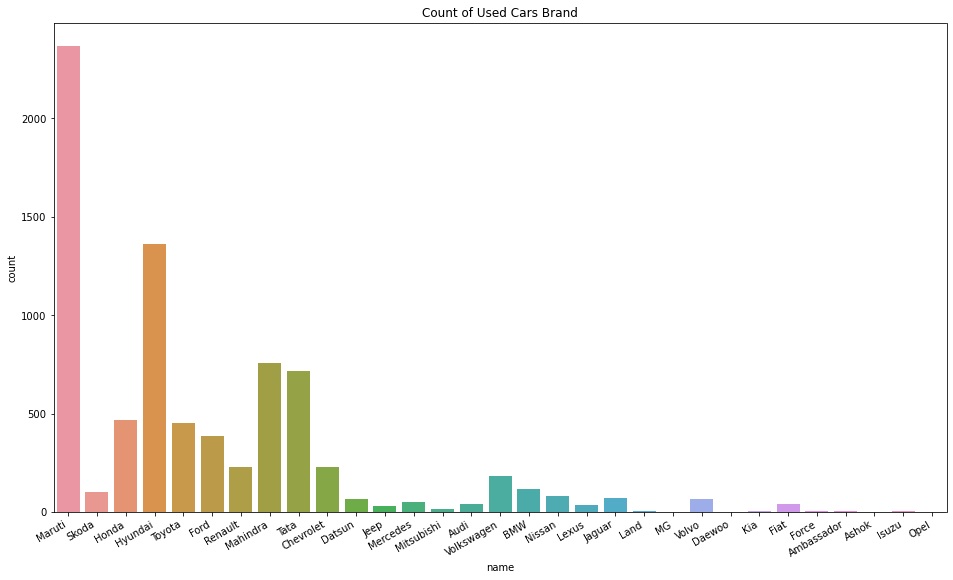

In [23]:
#Count of used cars
fig, ax = plt.subplots(figsize=(16,9))
plt.title("Count of Used Cars Brand")
sns.countplot(x = 'name', data =cars)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

From the above plot, It can be seen that  Maruti had the highest count. 

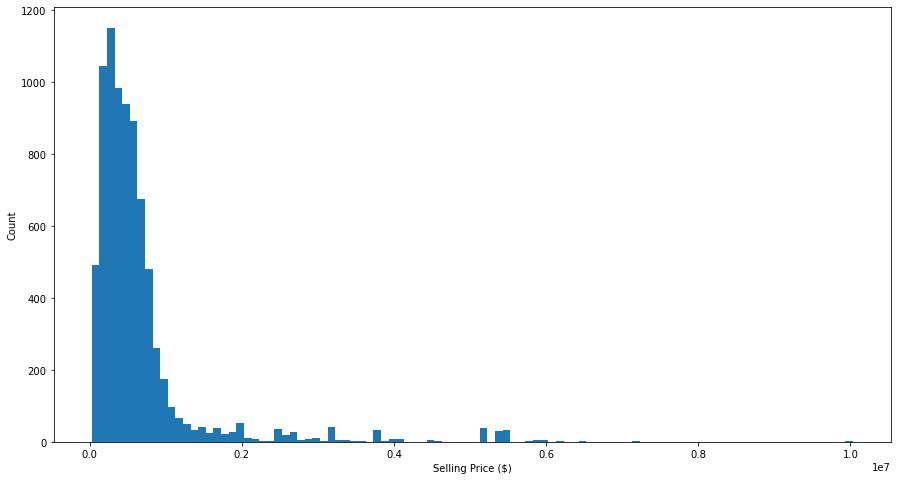

In [24]:
# start with a standard-scaled plot
binsize = 100000
bins = np.arange(29000, cars['selling_price'].max()+binsize, binsize)

plt.figure(figsize=[15, 8])
plt.hist(data = cars, x = 'selling_price', bins = bins)
plt.xlabel('Selling Price (Lakh)')
plt.ylabel("Count")
plt.show()

The above plot is rightly skewed, most of the selling prices of most cars  were less than a million lakhs

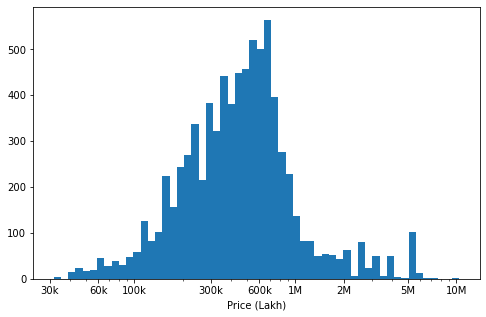

In [25]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.045
bins = 10 ** np.arange(4.5, np.log10(cars['selling_price'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = cars, x = 'selling_price', bins = bins)
plt.xscale('log')
plt.xticks([3e4 , 6e4, 1e5, 3e5, 6e5, 1e6, 2e6, 5e6, 1e7 ],['30k', '60k', '100k', '300k', '600k', '1M', '2M', '5M', '10M'])
plt.xlabel('Price (Lakh)')
plt.show()

Selling Price has a long-tailed distribution, with most cars sold at a low price, and few on the high price end. When plotted on a log-scale, the price distribution looks unimodal, with one peak between 600k and 1M.  

Next up, the first predictor variable of interest: mileage.

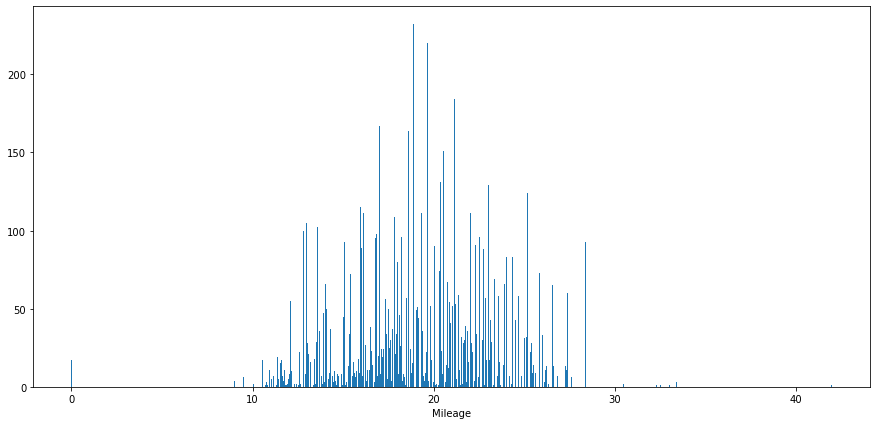

In [26]:
# plotting carat on a standard scale
binsize = 0.05
bins = np.arange(0,cars['mileage'].max()+binsize, binsize)

plt.figure(figsize=[15, 7])
plt.hist(data = cars , x = 'mileage', bins = bins)
plt.xlabel('Mileage')
plt.show()

from the above plot, the distribution seems clumsy and hard to tell, using a log transform on Mileage would help se the distribution clearly.

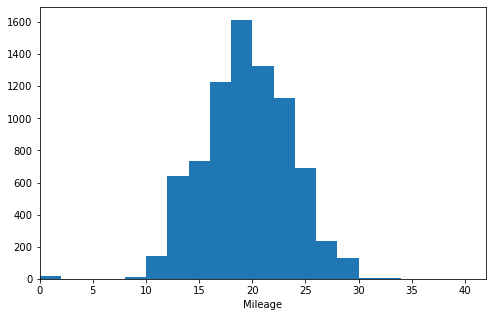

In [27]:
# investigating further on a larger bin size
binsize = 2
bins = np.arange(0, cars['mileage'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = cars, x = 'mileage', bins = bins)
plt.xlim([0,42])    
plt.xlabel('Mileage')
plt.show()

The above plot shows a unimodal distribution, with the peak value in between 18 and 20 miles travelled

In the case of the engine power plot is multimodal ditribution,using a big bin size captures the districution better.Engine Power varies from 600 to 3700



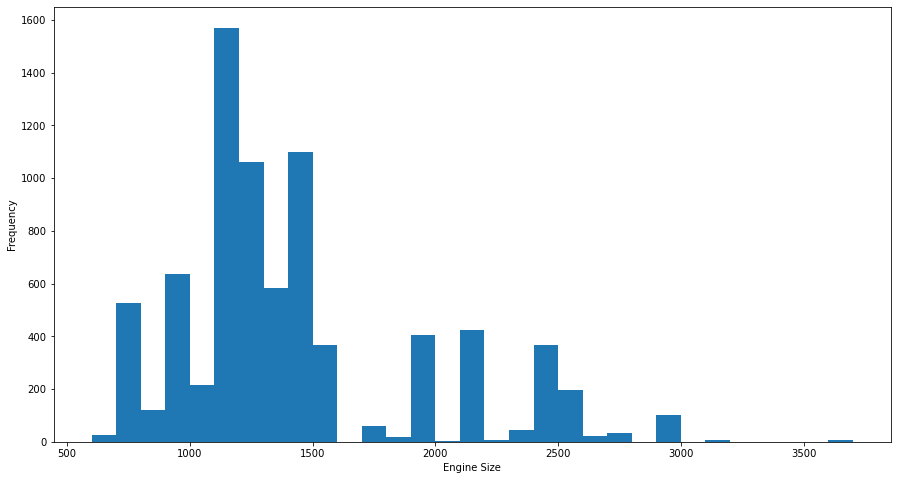

In [53]:
#investing the engine power of the cars
binsize = 100
bins = np.arange(600, cars['engine'].max()+binsize, binsize)

plt.figure(figsize=[15, 8])
plt.hist(data = cars, x = 'engine', bins = bins)
plt.xlabel('Engine Power')
plt.ylabel("Frequency")
plt.show()

In [242]:
car_rates=cars.groupby('name', as_index=False) ['selling_price'].max()
car_rates

,name,selling_price
0,Ambassador,200000
1,Ashok,300000
2,Audi,6523000
3,BMW,7200000
4,Chevrolet,1295000
5,Daewoo,100000
6,Datsun,590000
7,Fiat,700000
8,Force,1050000
9,Ford,3250000


<AxesSubplot:title={'center':'Highest 10 Priced Cars'}, xlabel='name'>

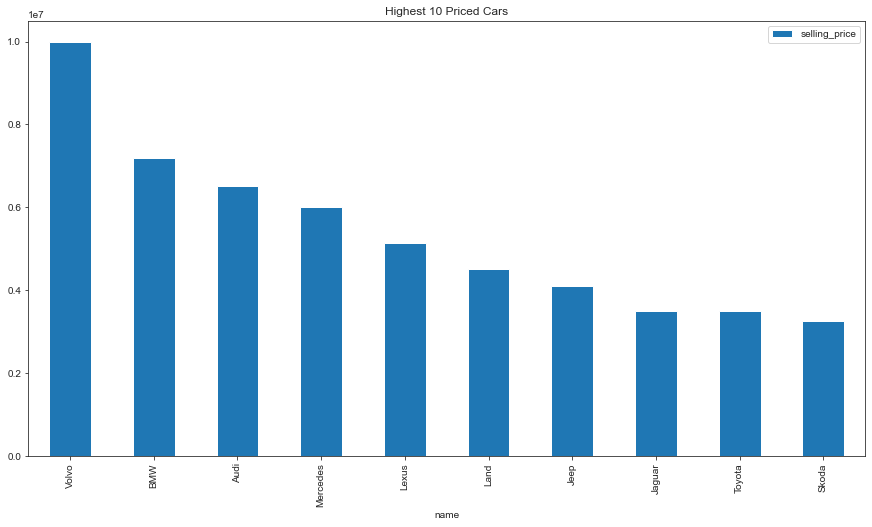

In [244]:
high_priced_cars= car_rates.nlargest(10, 'selling_price')
high_priced_cars.set_index('name', inplace=True)
high_priced_cars.plot(kind="bar", title='Highest 10 Priced Cars',  figsize=(15,8))

In [120]:
low_priced_cars= low_car_rates.nsmallest(10, 'selling_price')
low_priced_cars.set_index('name', inplace=True)

<AxesSubplot:title={'center':'Least 10 Priced Cars'}, xlabel='name'>

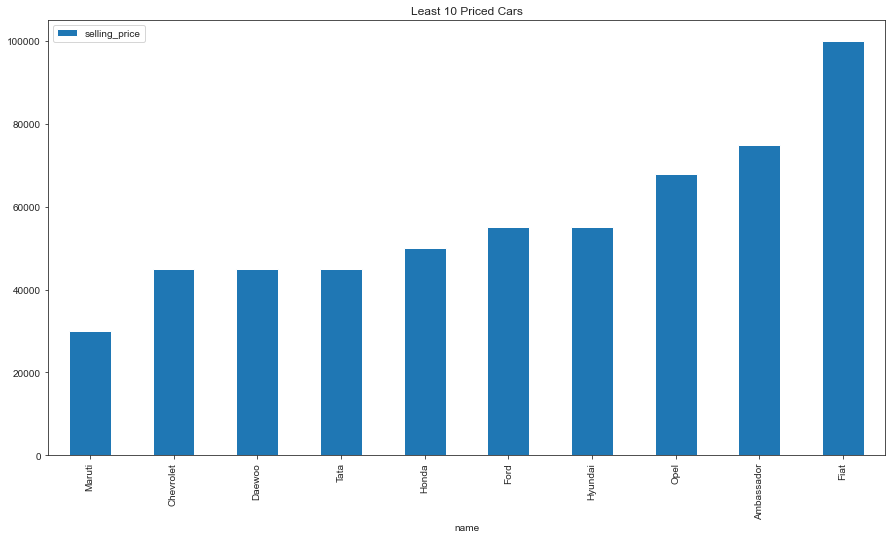

In [135]:
#Least priced cars
low_priced_cars.plot(kind="bar", title='Least 10 Priced Cars',  figsize=(15,8))

The above plot shows the 10 least priced cars, with Maruti been the lowest priced car.

<AxesSubplot:xlabel='Region', ylabel='count'>

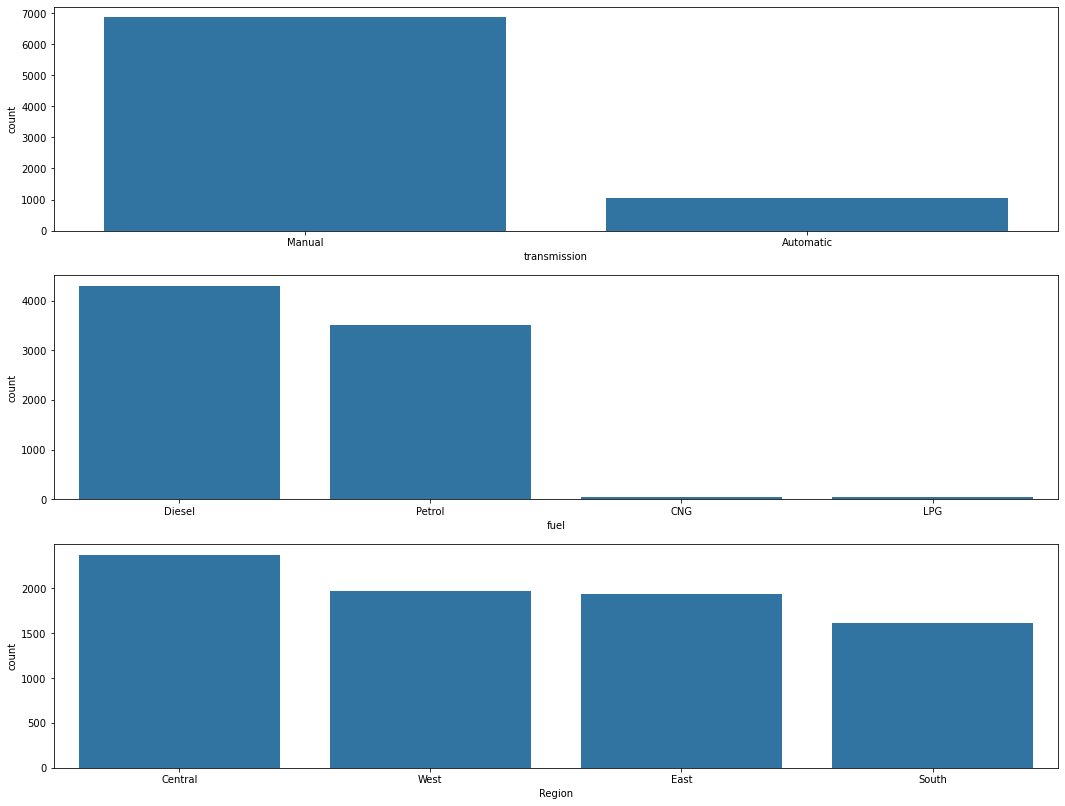

In [29]:
# let's plot three categorial variables together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [18,14])

default_color = sns.color_palette()[0]
sns.countplot(data = cars, x = 'transmission', color = default_color, ax = ax[0])
sns.countplot(data =cars, x = 'fuel', color = default_color, ax = ax[1])
sns.countplot(data = cars, x = 'Region', color = default_color, ax = ax[2])


The mode of transmission of the cars were more of manual than automatic.There is a high rate of cars with Diesel as their source of fuel, followed by Petrol, few ran on CNG and LPG.

The third plot, shows that there were more cars used in the Central Region, followed by the West, East and the least in the South.

I'll now look at the other features in the data to see if any of them hold interesting properties.

In [30]:
#Sales ID wont be useful in our analysis, hence would be dropped
cars.drop('Sales_ID', axis='columns', inplace=True)

In [31]:
cars.sample(5)

,name,year,selling_price,km_driven,Region,State,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
1237,Hyundai,2017,650000,8000,Central,Michigan,Canton,Petrol,Individual,Manual,First_Owner,18.60,1197,81.83,114.7Nm@ 4000rpm,5,Y
5425,Volkswagen,2008,585000,120000,West,Arizona,Glendale,Diesel,Individual,Automatic,First_Owner,14.30,1968,140.00,"36.6@ 1,750-2,500(kgm@ rpm)",5,N
3687,Hyundai,2017,300000,15151,West,Arizona,Oro Valley,Petrol,Individual,Manual,Second_Owner,21.10,814,55.20,74.5Nm@ 4000rpm,5,N
3169,Hyundai,2017,800000,14000,South,Kentucky,Covington,Diesel,Individual,Manual,First_Owner,22.54,1396,88.73,219.7Nm@ 1500-2750rpm,5,N
7485,Honda,2016,1350000,74000,South,Florida,Pembroke Pines,Petrol,Dealer,Automatic,First_Owner,13.70,1997,153.86,190Nm@ 4300rpm,5,N


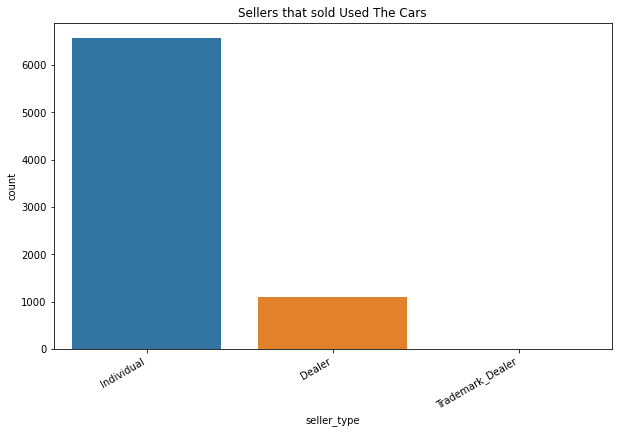

In [116]:
#count of type of sellers
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=cars, x='seller_type');
plt.title("Sellers that sold Used The Cars")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

Individual sellers had more counts than  Dealer, Trademark Dealer had no count.

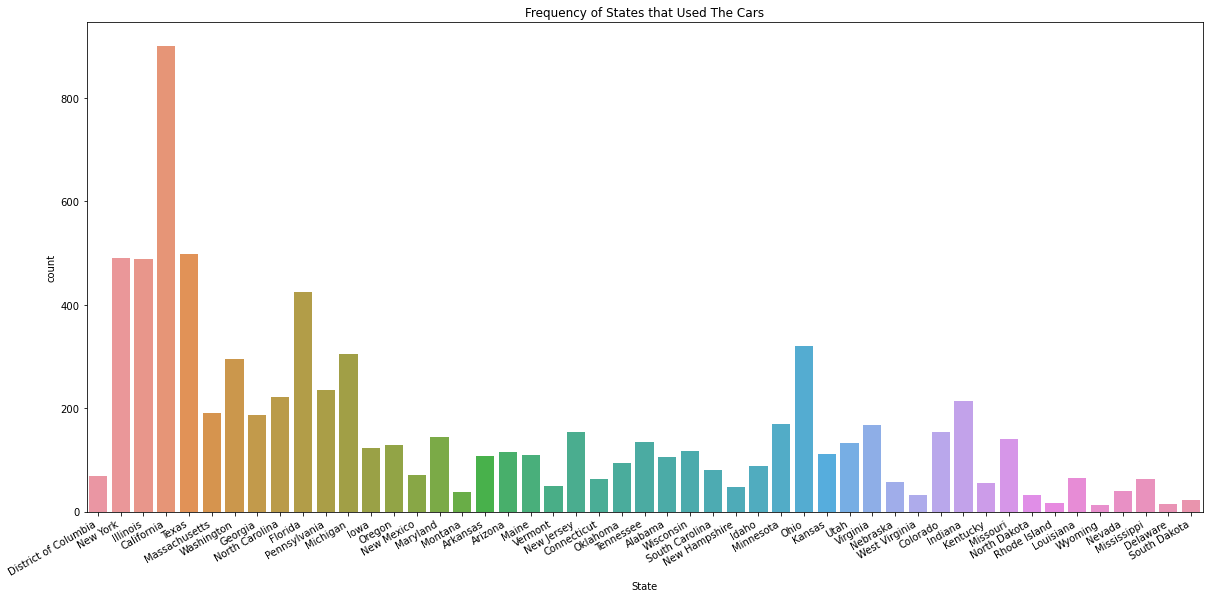

In [54]:
fig, ax = plt.subplots(figsize=(20,9))
#fig, ax=plt.subplots(1,2, figsize= (10,6))
sns.countplot(x = 'State', data =cars)
plt.title("Frequency of States that Used The Cars")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

California had the highest count of used cars at around 1000, New York and Ilinois had same count of used cars around 500

In [87]:
Cars_soldby_State=sold.groupby('State')
Cars_soldby_State

In [99]:
for State, State_df in Cars_soldby_State:
    if State == "California":
        print(State)
        print(State_df)

California
           name  year  selling_price  km_driven Region       State  \
140        Audi  2015        2650000      53000   West  California   
132         BMW  2018        3790000      29500   West  California   
410         BMW  2019        5500000       8500   West  California   
642         BMW  2019        5500000       8500   West  California   
297   Chevrolet  2012         120000      60000   West  California   
..          ...   ...            ...        ...    ...         ...   
104  Volkswagen  2010         700000     114000   West  California   
356  Volkswagen  2016         800000      70000   West  California   
940  Volkswagen  2012         350000      40000   West  California   
399       Volvo  2019        3800000      20000   West  California   
413       Volvo  2018        2475000       2000   West  California   

              City    fuel seller_type transmission        owner  mileage  \
140    Los Angeles  Diesel      Dealer    Automatic  First_Owner    12.

from the group above, it can be seen that the state of California had 274 values, hence I would have to drill further to see if they sold more cars tha other states

In [79]:
cars_State.sort_values(by=['State','selling_price'], ascending=False)

,name,year,selling_price,km_driven,Region,State,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
131,Mercedes,2017,6000000,37000,West,California,Los Angeles,Diesel,Dealer,Automatic,First_Owner,13.50,2987,254.79,620Nm@ 1600-2400rpm,5,Y
142,Mercedes,2017,5850000,47000,West,California,Los Angeles,Diesel,Dealer,Automatic,First_Owner,13.50,2987,282.00,490Nm@ 1600rpm,5,Y
410,BMW,2019,5500000,8500,West,California,Los Angeles,Diesel,Dealer,Automatic,First_Owner,16.78,1995,190.00,400Nm@ 1750-2500rpm,5,Y
642,BMW,2019,5500000,8500,West,California,San Francisco,Diesel,Dealer,Automatic,First_Owner,16.78,1995,190.00,400Nm@ 1750-2500rpm,5,Y
130,Land,2019,4500000,21000,West,California,Los Angeles,Diesel,Dealer,Automatic,First_Owner,12.83,1999,148.31,382nm@ 1750-2250rpm,7,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Maruti,2005,65000,35000,West,California,Los Angeles,Petrol,Individual,Manual,First_Owner,18.90,998,67.10,90Nm@ 3500rpm,5,Y
321,Maruti,2002,60000,100000,West,California,San Diego,Petrol,Individual,Manual,Fourth_Above_Owner,17.30,993,60.00,78Nm@ 4500rpm,5,Y
7,Maruti,2001,45000,5000,West,California,Los Angeles,Petrol,Individual,Manual,Second_Owner,16.10,796,37.00,59Nm@ 2500rpm,4,Y
689,Tata,2011,45000,10000,West,California,Los Angeles,Petrol,Individual,Manual,Third_Owner,26.00,624,35.00,48Nm@ 3000rpm,4,Y


In [ ]:
cars_State

In [95]:
cars_State = sold.loc[sold.State == 'California']

In [97]:
cars_State['name'].value_counts()

Maruti        90
Hyundai       47
Mahindra      26
Tata          18
Toyota        17
Honda         16
Ford          12
Chevrolet     10
Nissan         8
Renault        7
Datsun         3
Volkswagen     3
Jaguar         3
BMW            3
Mercedes       3
Volvo          2
Skoda          2
Land           1
Audi           1
MG             1
Jeep           1
Name: name, dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

  a large range of values, so I looked at the data using a log transform. Under the transformation, the price distribution looks unimodal, with one peak between 600k and 1M.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating variables i feel might infuence selling price of the used cars, I noticed that the minimum value of mileage was 0.0, which was weird, Could it have been an outlier, or the car has never been used or moved.
## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [33]:
#categorizing the numeric variablrs and categorical features 
numeric_vars = ['year','km_driven', 'selling_price', 'mileage','engine','max_power','seats']
categoric_vars = ['transmission', 'fuel', 'seller_type', 'Region']

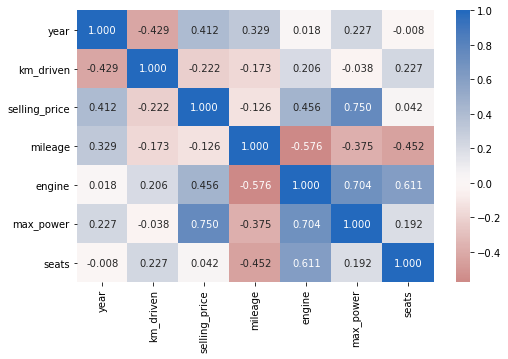

In [34]:
# correlation plot of all the numeric variables
plt.figure(figsize = [8, 5])
sns.heatmap(cars[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)   
plt.show()

cars.shape= (7906, 17)
cars_samp.shape= (500, 17)


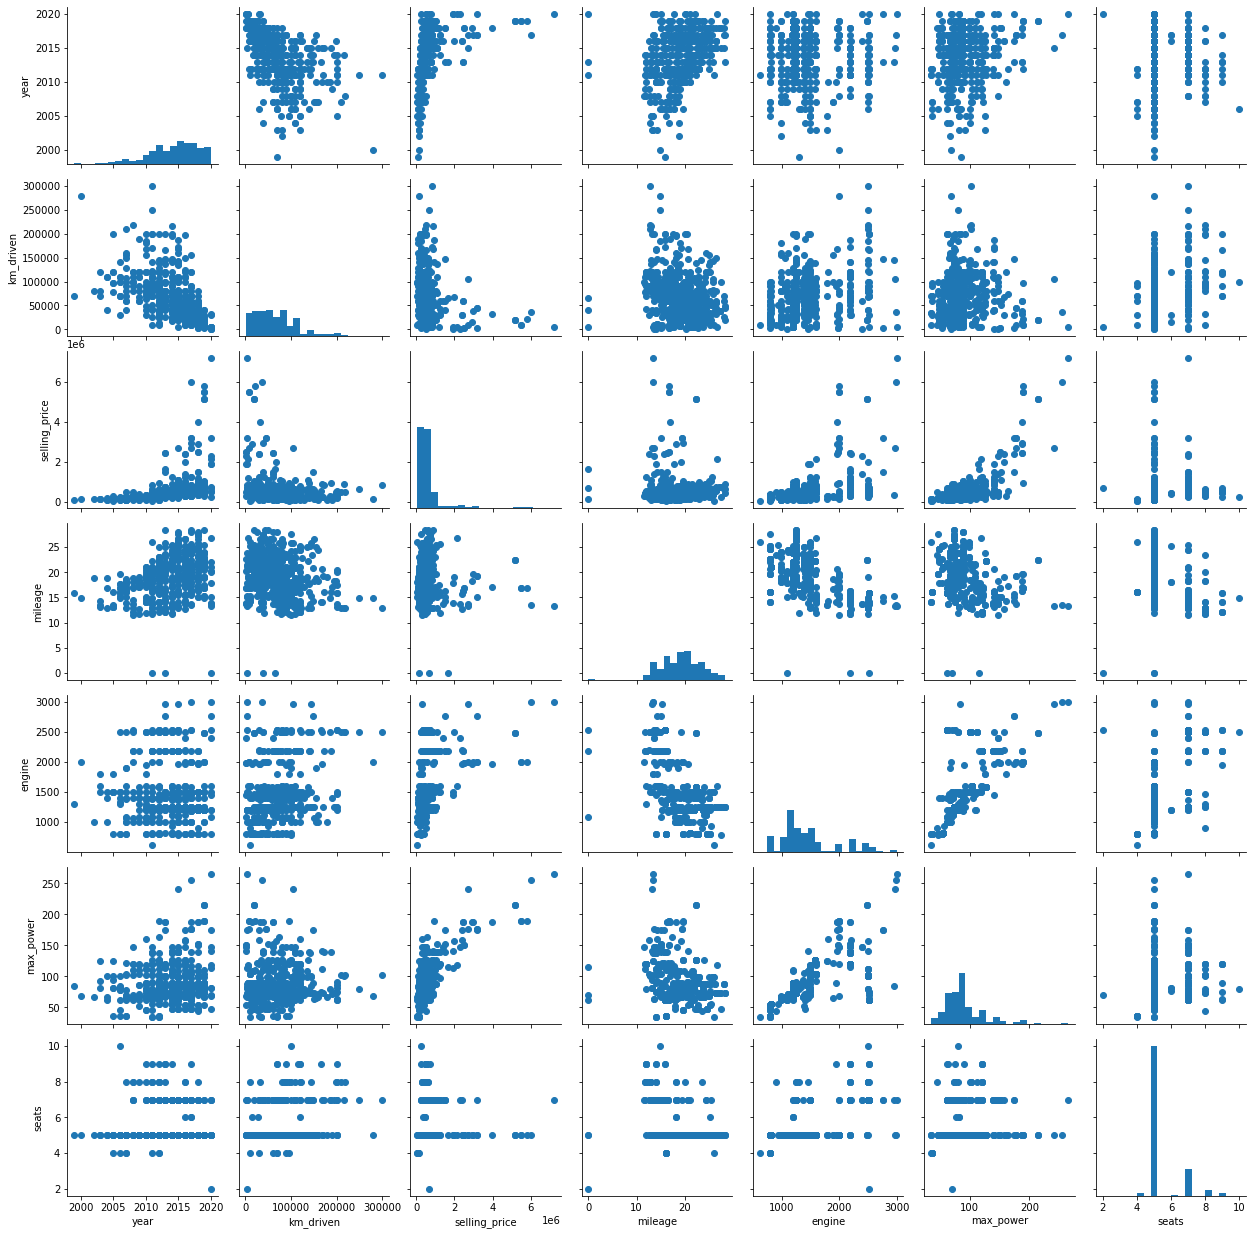

In [35]:
# plot matrix: sample 500 cars so that plots are clearer and they render faster
print("cars.shape=",cars.shape)
cars_samp = cars.sample(n=500, replace = False)
print("cars_samp.shape=",cars_samp.shape)

g = sns.PairGrid(data = cars_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

Max power and engine power seems to be positively correlated with selling price of the cars, km_driven has a negative correlation with selling price.Other plots are either negatively correlated with the selling price or have no correlation at all.



<Figure size 720x720 with 0 Axes>

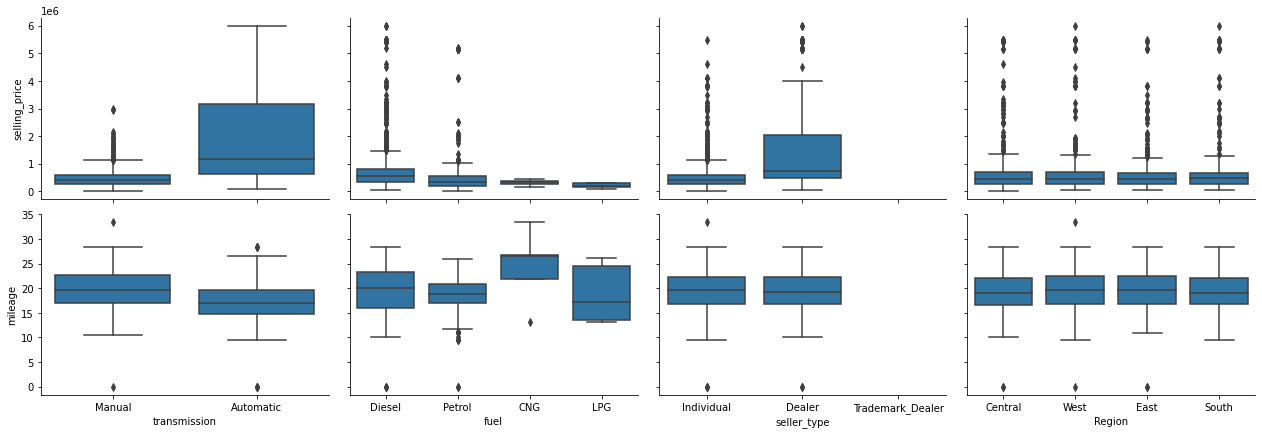

In [102]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.
 
cars_samp = cars.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)
#plt.yscale('log')
plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = cars_samp, y_vars = ['selling_price', 'mileage'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();



From the box plots above of 2000 samples, selling price of Manual cars was less than 3M, meanwhile for automatic cars was pegged at 6M and below.The box plot for fuel as against selling price tallies with the earlier plot that fuel source of LPG and CNG were in minute quantities. With most of the cars running on either fuel source of Diesel or Petrol.Individual sellers cars selling price  seems to be unclear, could thse points above the maximum value be outlers, if so it would be against the count plot plotted earlier.As for Region, it seems selling price had no effect on the region, as their distribution looks similar. 

As for Mileage, Manual Cars seemed to cover more miles, than automatic. Cars that ran on Diesel, covered a larger distance from 10miles to 29 miles. 

In [37]:
cars['year'].value_counts()

2017    1010
2016     856
2018     806
2015     775
2013     668
2012     621
2014     620
2019     583
2011     570
2010     375
2009     231
2008     201
2007     173
2006     102
2005      76
2020      74
2004      51
2003      37
2002      19
2000      15
1999      14
1997       9
1998       9
2001       6
1996       2
1994       2
1995       1
Name: year, dtype: int64

Text(0.5, 1.0, 'Selling Price by Year Purchased')

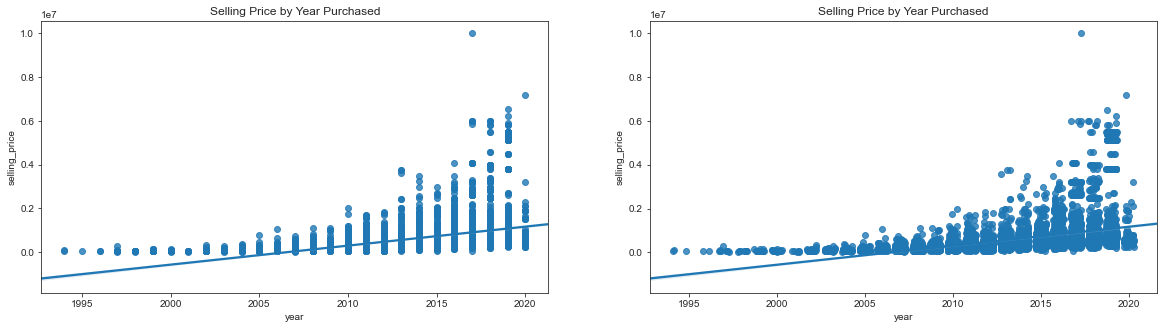

In [241]:
#checking for the correlation between year and selling price
##########################################
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sns.regplot(data = cars, x = 'year', y = 'selling_price', truncate=False);
plt.title('Selling Price by Year Purchased')
##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3
sns.regplot(data = cars, x = 'year', y = 'selling_price', truncate=False, x_jitter=0.3);
plt.title('Selling Price by Year Purchased')

Interestingly, it appears that there are some little positive relationships between the year the cars were purchased and the rate they would be sold at.

In [40]:
low_car_rates=cars.groupby('name', as_index=False) ['selling_price'].min()
low_car_rates

,name,selling_price
0,Ambassador,75000
1,Ashok,300000
2,Audi,730000
3,BMW,480000
4,Chevrolet,45000
5,Daewoo,45000
6,Datsun,150000
7,Fiat,100000
8,Force,555000
9,Ford,55000


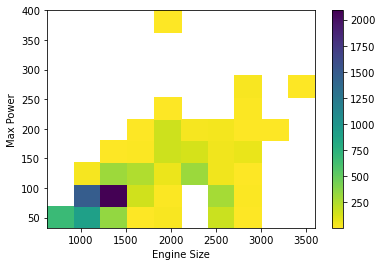

In [113]:
# Specify bin edges 
bins_x = np.arange(500, cars['engine'].max()+0.7, 0.7)
bins_y = np.arange(50,  cars['max_power'].max()+7, 7)

# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data = cars, x = 'engine', y = 'max_power', cmin=0.5, cmap='viridis_r' bins=[bins_x])
plt.colorbar()
plt.xlabel('Engine Power')
plt.ylabel('Max Power');

A larger chunk of used cars with an engine power of 1000-1500 generated max power between 50-100 Max power.

In [42]:
cars.head()

,name,year,selling_price,km_driven,Region,State,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


In [43]:
#assigning a data frame for vehicles sold and not sold
not_sold=cars[cars.sold =='N']
sold=cars[cars.sold =='Y']

In [133]:
not_sold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5906 entries, 2000 to 7905
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           5906 non-null   object  
 1   year           5906 non-null   int64   
 2   selling_price  5906 non-null   int64   
 3   km_driven      5906 non-null   int64   
 4   Region         5906 non-null   category
 5   State          5906 non-null   object  
 6   City           5906 non-null   object  
 7   fuel           5906 non-null   category
 8   seller_type    5750 non-null   category
 9   transmission   5906 non-null   category
 10  owner          5906 non-null   object  
 11  mileage        5906 non-null   float64 
 12  engine         5906 non-null   int64   
 13  max_power      5906 non-null   float64 
 14  torque         5906 non-null   object  
 15  seats          5906 non-null   int64   
 16  sold           5906 non-null   object  
dtypes: category(4), float64(2), in

In [134]:
sold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1174 to 1183
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           2000 non-null   object  
 1   year           2000 non-null   int64   
 2   selling_price  2000 non-null   int64   
 3   km_driven      2000 non-null   int64   
 4   Region         2000 non-null   category
 5   State          2000 non-null   object  
 6   City           2000 non-null   object  
 7   fuel           2000 non-null   category
 8   seller_type    1920 non-null   category
 9   transmission   2000 non-null   category
 10  owner          2000 non-null   object  
 11  mileage        2000 non-null   float64 
 12  engine         2000 non-null   int64   
 13  max_power      2000 non-null   float64 
 14  torque         2000 non-null   object  
 15  seats          2000 non-null   int64   
 16  sold           2000 non-null   object  
dtypes: category(4), float64(2), in

In [46]:
not_sold['name'].value_counts().nlargest(10)

Maruti        1770
Hyundai       1028
Mahindra       557
Tata           541
Honda          342
Toyota         326
Ford           296
Chevrolet      174
Renault        172
Volkswagen     146
Name: name, dtype: int64

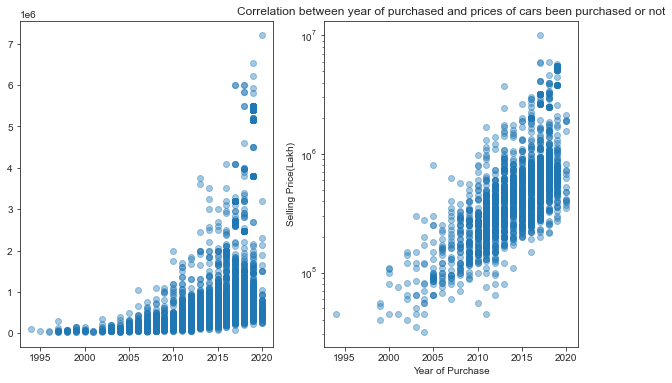

In [196]:
fig, ax=plt.subplots(1,2, figsize= (10,6))
ax[0].scatter(x= not_sold['year'], y=not_sold['selling_price'],alpha=4/10)
ax[1].scatter(x= sold['year'], y=sold['selling_price'], alpha=4/10)
plt.yscale("log")
plt.ylabel("Selling Price(Lakh)")
plt.xlabel("Year of Purchase")
plt.title("Correlation between year of purchased and prices of cars been purchased or not")
#ax.set_yticks(y, labels=([3e4 , 6e4, 1e5, 3e5, 6e5, 1e6, 2e6, 5e6, 1e7 ],['30k', '60k', '100k', '300k', '600k', '1M', '2M', '5M','10M']))
plt.show();
#plt.set_yticklabels([3e4 , 6e4, 1e5, 3e5, 6e5, 1e6, 2e6, 5e6, 1e7 ],['30k', '60k', '100k', '300k', '600k', '1M', '2M', '5M','10M'])


It could be seen that from the first plot depicts selling price of cars not sold and the year they were purchased, the range of prices for vehicles not sold were mostly below 2 million lakhs and cars that were mosl purchased from 2010 upwards. 

For cars that were sold, Most of them were purchased from 2008 upwards and sold at above 100,000 t0 10M.

In [197]:
cars_sold_by_state=sold.groupby("State")['sold'].count()
cars_sold_by_state.nlargest(10)

State
New York          293
California        274
Illinois          148
Texas             138
Washington        120
Florida           118
Pennsylvania       80
Massachusetts      76
North Carolina     75
Michigan           71
Name: sold, dtype: int64

In [185]:
cars_sold_by_city=sold.groupby("City")['sold'].count()
cars_sold_by_city.nlargest(10)

City
New York City    196
Los Angeles      191
Seattle           86
Chicago           83
Boston            69
Washington        68
Philadelphia      51
Miami             41
Charlotte         39
Atlanta           38
Name: sold, dtype: int64

New York City sold the most amongst the cities that sold used cars.

In [103]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

cars['log_price'] = cars['selling_price'].apply(log_trans)

In [190]:
categoric_vars

['transmission', 'fuel', 'seller_type', 'Region']

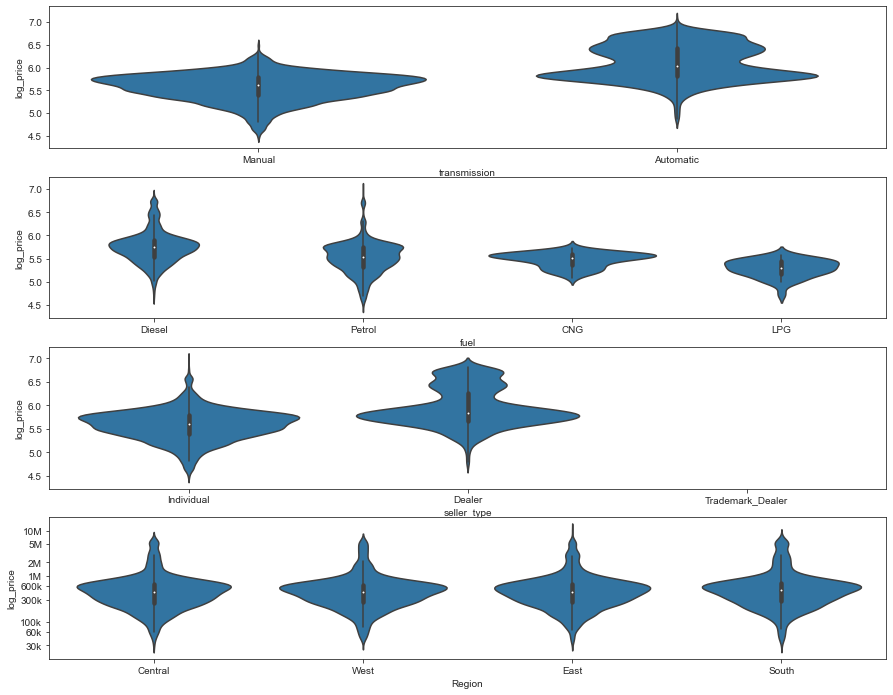

In [191]:
# plot the categorical variables against price, this time  with full data and variable transforms
fig, ax = plt.subplots(ncols=1,nrows = 4, figsize = [15,12])
default_color = sns.color_palette()[0]
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sns.violinplot(data = cars, x = var, y = 'log_price', ax = ax[i],color = default_color)
ax[i].set_yticks(log_trans(np.array([3e4 , 6e4, 1e5, 3e5, 6e5, 1e6, 2e6, 5e6, 1e7 ])))
ax[i].set_yticklabels(['30k', '60k', '100k', '300k', '600k', '1M', '2M', '5M', '10M'])


plt.show()


The plot of the full data using a violin plot and variable transformations reveals much more than the earlier box plots. It could be obviously seen that cars wit automatic tranmission had a wide spread of higher selling price than the manual.Manual had a wide spread between 5.5M to 6M.

In [122]:
cars['owner'].unique()

array(['First_Owner', 'Second_Owner', 'Third_Owner', 'Fourth_Above_Owner',
       'Test_Drive_Car'], dtype=object)

In [123]:
#categorizing the owners 
owner = ['First_Owner', 'Second_Owner', 'Third_Owner', 'Fourth_Above_Owner', 'Test_Drive_Car']
owner_classes = pd.api.types.CategoricalDtype(ordered=True, categories=owner)

In [124]:
# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
cars['owner'] = cars['owner'].astype(owner_classes);

def title_labels(title, xlabel, ylabel):
plt.title(title)
plt.xlabel(xlabel) 
plt.ylabel(ylabel)

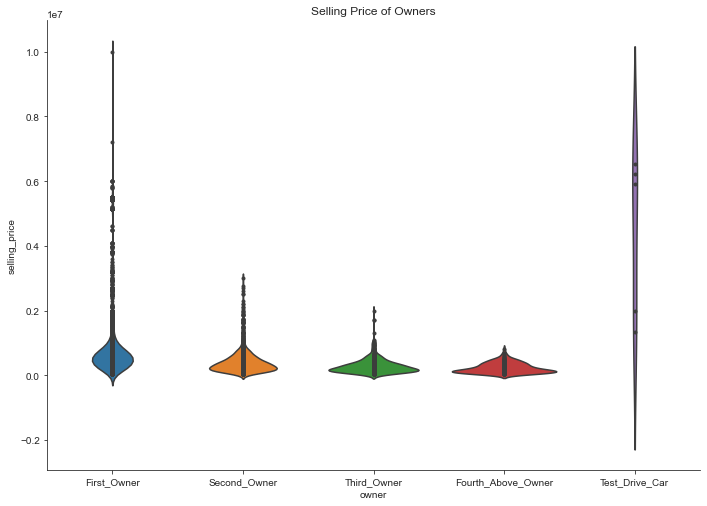

In [192]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.violinplot(data=cars, x='owner', y='selling_price', inner="points", ax=ax) 
plt.title('Selling Price of Owners')
sns.despine()

From the above plot, It can be seen that the first four categories of owners mostly sold their cars less than 2M, and a than distribution for above 2M. As for Test Drive Car owners, they sold below 1M 

                         
Price had a surprisingly high amount of correlation with the year the cars were purchased, cars that were sold were mostly purchased in 2008 and upwards and sold at above 100,000 t0 10M. The state of California was seen to have the most count of used cars, New York sold more, followed by California. The count of cars a state had, didn't influence the amount of cars sold. A larger chunk of used cars with an engine power of 1000-1500 generated max power between 50-100 Max power.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There was also an interesting relationship observed between price and the categorical features. For all of transmission, fuel, region and type of seller. A high frequency of the cars ran on either fuel source of Diesel or Petrol, with on CNG and LPG. As for Region, it seems selling price had no effect on the region, as their distribution looks similar. Cars with automatic tranmission had a wide spread of higher selling price than the manual cars.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the three categorical measures affect the selling price of used cars.

In [129]:
cars['fuel'].unique()

['Diesel', 'Petrol', 'LPG', 'CNG']
Categories (4, object): ['Diesel' < 'Petrol' < 'CNG' < 'LPG']

(array([0, 1]), [Text(0, 0, 'Y'), Text(1, 0, 'N')])

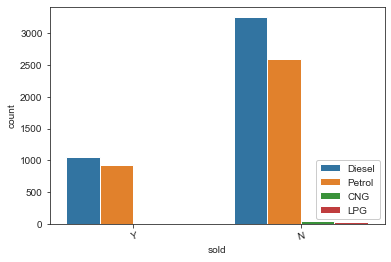

In [130]:
#categorizing cars into sold or not and their fuel types
sold_classes = ['Y', 'N']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    sold_cars_classes = pd.api.types.CategoricalDtype(ordered = True, categories = sold_classes)
    cars['sold'] = cars['sold'].astype(sold_cars_classes)
else: # pre-v0.21
    cars['sold'] = cars['sold'].astype('category', ordered = True,categories = sold_classes)
car_fuel = cars.loc[cars['fuel'].isin(['Diesel', 'Petrol', 'LPG', 'CNG'])]
  # plotting
ax = sns.countplot(data = car_fuel, x = 'sold', hue = 'fuel')
ax.legend(loc = 4, framealpha = 1) # lower right, no transparency
plt.xticks(rotation = 15)

None of the sold cars were of fuel source CPG nor LPG. There was a higher ratio of cars that ran on Diesel with a slight difference than that of Petrol.  

In [160]:
cars['engine'].describe()

count    7906.000000
mean     1458.708829
std       503.893057
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1582.000000
max      3604.000000
Name: engine, dtype: float64

In [161]:
# select cars of approximately 1500 engine power
cars_flag = (cars['engine'] >= 1458) & (cars['engine'] <= 1500)
cars_small = cars.loc[cars_flag,:]

In [162]:
# select cars with above 1500 engine power
cars_flag = (cars['engine'] >= 1500) & (cars['engine'] <= 3700)
cars_big = cars.loc[cars_flag,:]

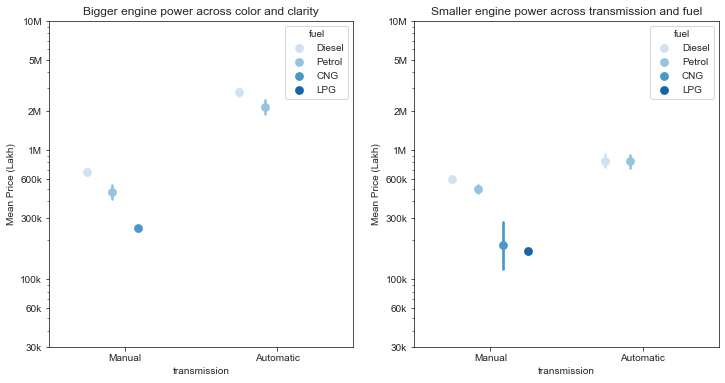

In [220]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])

sns.pointplot(data = cars_big, x = 'transmission', y = 'selling_price', hue = 'fuel',
             palette = 'Blues', linestyles = '', dodge = 0.5, ax = ax[0])
ax[0].set_title('Bigger engine power transmission and fuel')
ax[0].set_ylabel('Mean Price (Lakh)')
ax[0].set_yscale('log')
ax[0].set_yticks([3e4 , 6e4, 1e5, 3e5, 6e5, 1e6, 2e6, 5e6, 1e7 ])        
ax[0].set_yticklabels(['30k', '60k', '100k', '300k', '600k', '1M', '2M', '5M', '10M'])
ax[0].set_yticklabels([],minor = True)

sns.pointplot(data = cars_small, x = 'transmission', y = 'selling_price', hue = 'fuel',
             palette = 'Blues', linestyles = '', dodge = 0.5, ax = ax[1])
ax[1].set_title('Smaller engine power across transmission and fuel')
ax[1].set_ylabel('Mean Price (Lakh)')
ax[1].set_yscale('log')
ax[1].set_yticks([3e4 , 6e4, 1e5, 3e5, 6e5, 1e6, 2e6, 5e6, 1e7 ])
ax[1].set_yticklabels(['30k', '60k', '100k', '300k', '600k', '1M', '2M', '5M', '10M'])
ax[1].set_yticklabels([],minor = True)

plt.show();

Cars with bigger engine with automatic transmission fuel source was either Diesel or Petrol, and on a average were highly priced. But Manual transmission consisted of Diesel, Petrol and CNG cars were priced below 300k.

As for smaller engine power, Manual cars with fuel source; CNG ad LPG were priced below 300k, and Diesel and Petrol ranged from 300k-700k. And automatic, with a transmission of Diesel and Petrol ranging from 600k-1M averagely.

In [166]:
not_sold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5906 entries, 2000 to 7905
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           5906 non-null   object  
 1   year           5906 non-null   int64   
 2   selling_price  5906 non-null   int64   
 3   km_driven      5906 non-null   int64   
 4   Region         5906 non-null   category
 5   State          5906 non-null   object  
 6   City           5906 non-null   object  
 7   fuel           5906 non-null   category
 8   seller_type    5750 non-null   category
 9   transmission   5906 non-null   category
 10  owner          5906 non-null   object  
 11  mileage        5906 non-null   float64 
 12  engine         5906 non-null   int64   
 13  max_power      5906 non-null   float64 
 14  torque         5906 non-null   object  
 15  seats          5906 non-null   int64   
 16  sold           5906 non-null   object  
dtypes: category(4), float64(2), in

In [167]:
not_sold['selling_price'].nlargest(10)

2846    7200000
4813    6523000
4811    6223000
3978    6000000
4630    6000000
5114    6000000
7498    6000000
4812    5923000
6085    5830000
7382    5830000
Name: selling_price, dtype: int64

In [168]:
low_car_rates=cars.groupby('name', as_index=False) ['selling_price'].min()
low_car_rates

,name,selling_price
0,Ambassador,75000
1,Ashok,300000
2,Audi,730000
3,BMW,480000
4,Chevrolet,45000
5,Daewoo,45000
6,Datsun,150000
7,Fiat,100000
8,Force,555000
9,Ford,55000


In [169]:
low_car_rates.set_index('name', inplace=True)

<AxesSubplot:title={'center':'Low Priced Cars'}, xlabel='name'>

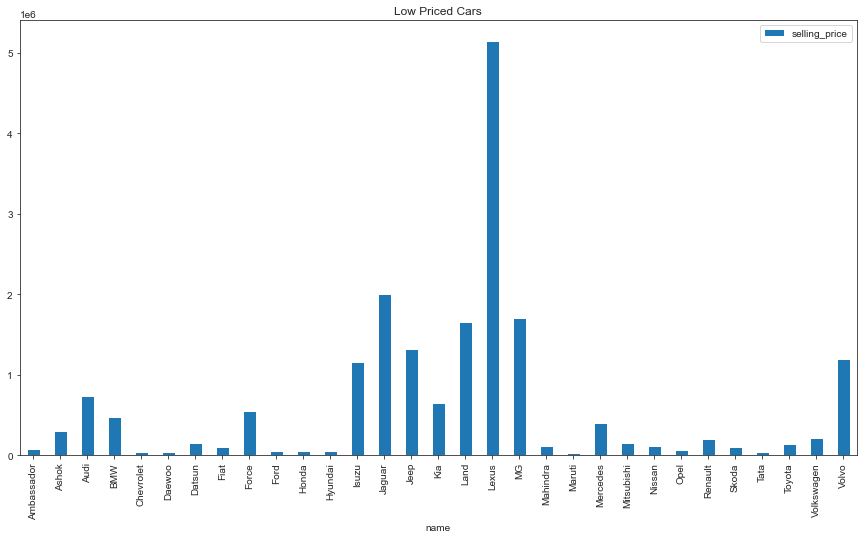

In [221]:
#Top Low priced cars
low_car_rates.plot(kind="bar", title='Low Priced Cars',  figsize=(15,8))

In [171]:
sold.km_driven.describe()

count    2.000000e+03
mean     6.870744e+04
std      5.614378e+04
min      1.000000e+03
25%      3.392100e+04
50%      6.000000e+04
75%      9.400000e+04
max      1.500000e+06
Name: km_driven, dtype: float64

In [176]:
#Top Fast cars
top_fast_cars=(sold['km_driven'].groupby(sold["name"]).nlargest(10))

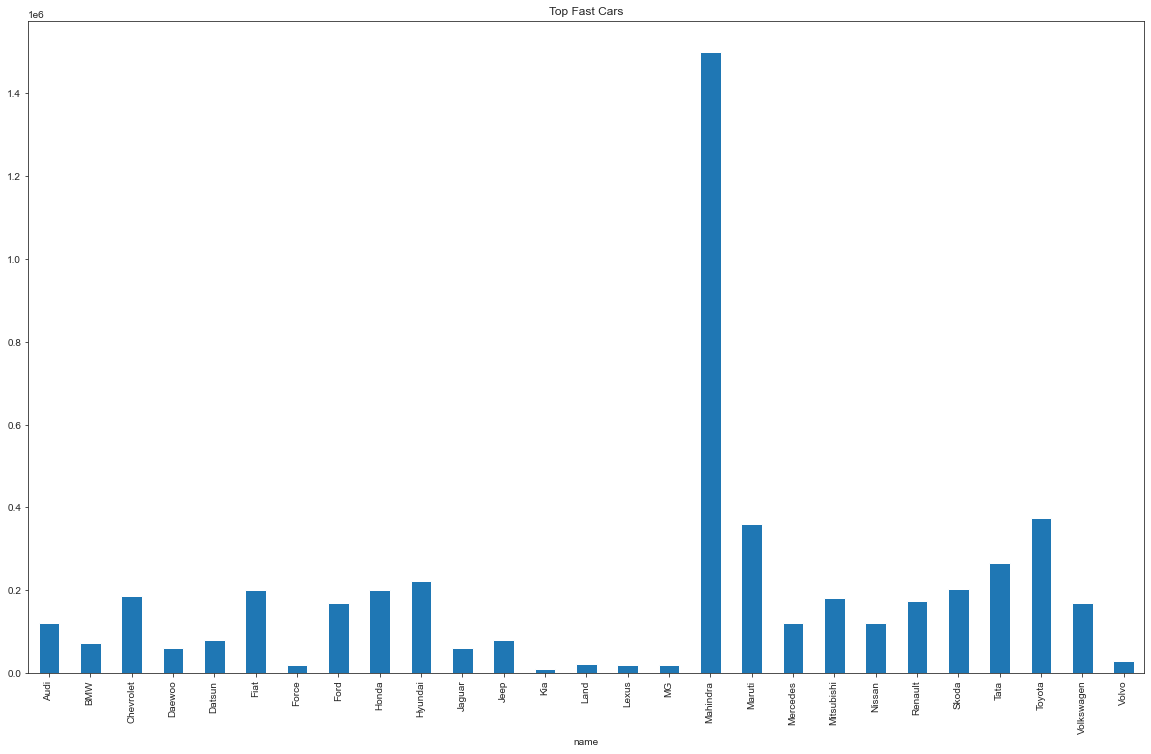

In [204]:
top_fast_cars=sold.groupby('name').km_driven.max(10).plot(kind="bar", figsize=(20,12), title=("Top Fast Cars"))

In [ ]:
Mahindra was the fastest amongst the cars sold.

In [174]:
Top_sold_cars=sold.groupby('name')['selling_price'].nlargest(10)
Top_sold_cars

name       
Audi   1513    3975000
       1803    3975000
       126     3975000
       1918    2825000
       140     2650000
                ...   
Volvo  361     3800000
       1088    3800000
       1069    3800000
       1050    3800000
       1774    3800000
Name: selling_price, Length: 214, dtype: int64

In [175]:
Top_sold_cars.groupby(sold['km_driven'])

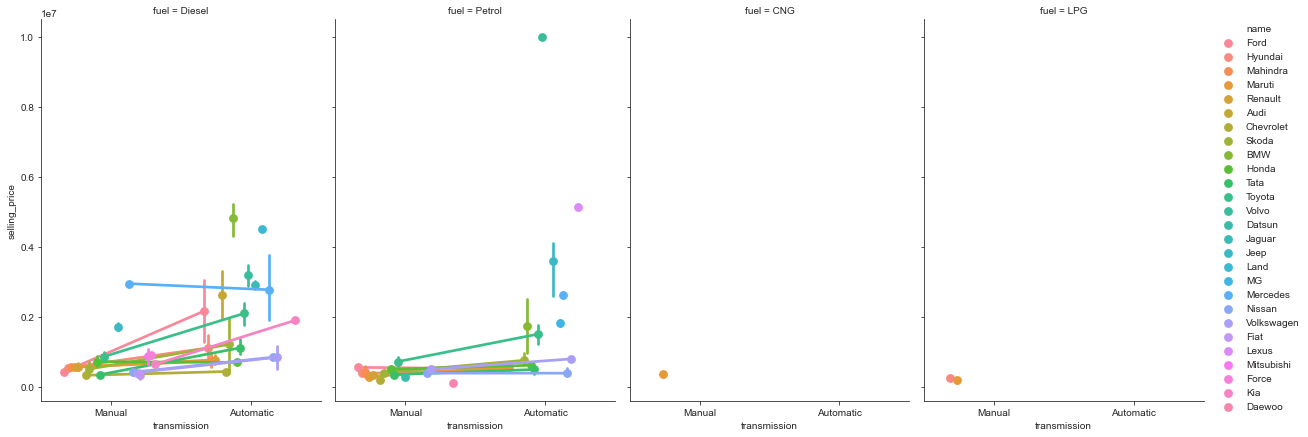

In [239]:
g = sns.catplot(x="transmission", y="selling_price",
                hue="name", col="fuel",
                data=sold, kind="point",
                dodge=True,
                height=6, aspect=.7);

From the above plot, it confirms the initial notion, that most cars ran on Diesel source of fuel. The highest sold vehicle, Volvo runs on Petrol as its fuel source.  Maruti is the only car sold that runs on CNG.A Ford car and Mahindra ran on LPG with low selling price.

In [180]:
sold['Region'].unique()

['South', 'West', 'East', 'Central']
Categories (4, object): ['Central' < 'West' < 'East' < 'South']

In [181]:
sold['owner'].unique()

array(['Second_Owner', 'First_Owner', 'Fourth_Above_Owner', 'Third_Owner'],
      dtype=object)

In [226]:
cars['seller_type'].nunique()

3

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Central'),
  Text(1, 0, 'West'),
  Text(2, 0, 'East'),
  Text(3, 0, 'South')])

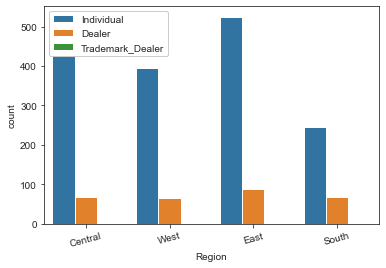

In [227]:
 # data setup
Region = ['East', 'Central', 'West', 'South']
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    sold_cars_classes = pd.api.types.CategoricalDtype(ordered = True, categories = Region)
    cars['sold'] = cars['sold'].astype(sold_cars_classes)
#else: # pre-v0.21
   # cars['sold'] = cars['sold'].astype('category', ordered = True,categories = sold_classes)
car_sellers = cars.loc[cars['seller_type'].isin(['Individual', 'Dealer', 'Trademark_Dealer'])]
  # plotting
#ax=sns.catplot( x="Region", hue="owner", kind="bar", data=sold)
ax = sns.countplot(data = sold, x = 'Region', hue = 'seller_type')
ax.legend(loc = 2, framealpha = 1) # lower right, no transparency
plt.xticks(rotation = 15)


From the above plot, none of the cars sold was by a Trademark Dealer, From all the regions, Individual sellers sold more than Dealers. 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Central'),
  Text(1, 0, 'West'),
  Text(2, 0, 'East'),
  Text(3, 0, 'South')])

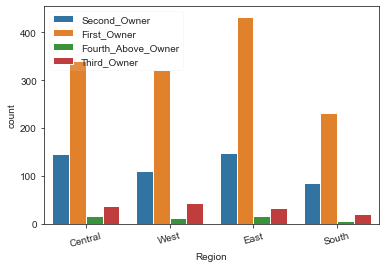

In [230]:
Region = ['East', 'Central', 'West', 'South']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    sold_cars_classes = pd.api.types.CategoricalDtype(ordered = True, categories = Region)
    cars['sold'] = cars['sold'].astype(sold_cars_classes)
#else: # pre-v0.21
   # cars['sold'] = cars['sold'].astype('category', ordered = True,categories = sold_classes)
car_owners = cars.loc[cars['owner'].isin(['First_Owner', 'Second_Owner', 'Third_Owner', 'Fourth_Above_Owner'])]
  # plotting
#ax=sns.catplot( x="Region", hue="owner", kind="bar", data=sold)
ax = sns.countplot(data = sold, x = 'Region', hue = 'owner')
ax.legend(loc = 2, framealpha = 0.1) # lower right, no transparency
plt.xticks(rotation = 15)


The Eastern region had more First Owners than other regions, followed by Second owners, ownership of the used cars had an effect in selling them.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From the above visualizations, I gathered that, First Car owners sold more than other owners, with the highest count in the Eastern Region, followed by Second Owners ranking higher also in the East.

### Were there any interesting or surprising interactions between features?

Looking back on the point plots, it is interesting to find that there were used cars sold that ran on fuel source, LPG and CNG, which the countplot didn't show earlier. I noticed that a car name could be one of either transmissions, and can vary in price.